In [82]:
# import modules to be used

import plotly
import plotly.express as px
import pandas as pd
import country_converter as coco


In [83]:
# load sand verify CSV file

country_data = pd.read_csv('Nomics.csv')
display(country_data.head())
display(country_data.tail())

,id,name,logo_url,transparency_grade,coverage_type,order_books,first_trade,first_candle,first_order_book,num_pairs,...,1d.trades_change,1d.trades_change_pct,1d.spot_volume,1d.spot_volume_change,1d.spot_volume_change_pct,1d.derivative_volume,1d.derivative_volume_change,1d.derivative_volume_change_pct,location,website_url
0,binance,Binance,https://s3.us-east-2.amazonaws.com/nomics-api/...,A,trades,True,2017-07-13T00:00:00Z,2017-07-13T00:00:00Z,2018-08-29T00:00:00Z,2135,...,-4183892,-0.0885,1.304019e+10,-1.190569e+09,-0.0837,2.192871e+10,-1.483203e+09,-0.0634,Malta,https://www.binance.com/
1,ftx,FTX,https://s3.us-east-2.amazonaws.com/nomics-api/...,A,trades,True,2019-03-05T00:00:00Z,2019-03-05T00:00:00Z,2019-10-15T00:00:00Z,1944,...,-335104,-0.0388,1.863079e+09,1.470773e+08,0.0857,1.594988e+10,5.437599e+09,0.5173,Antigua and Barbuda,https://ftx.com/
2,cryptomkt,CryptoMarket,https://s3.us-east-2.amazonaws.com/nomics-api/...,A,trades,True,2013-12-27T00:00:00Z,2013-12-27T00:00:00Z,2021-12-01T00:00:00Z,149,...,-24289,-0.0455,3.133991e+09,-2.742308e+08,-0.0805,NaN,NaN,NaN,Chile,https://www.cryptomkt.com/
3,gdax,Coinbase Exchange,https://s3.us-east-2.amazonaws.com/nomics-api/...,A,trades,True,2014-12-01T00:00:00Z,2014-12-01T00:00:00Z,2018-09-11T00:00:00Z,434,...,-137715,-0.0300,3.075138e+09,-1.358877e+08,-0.0423,NaN,NaN,NaN,United States,https://www.coinbase.com/
4,uniswapv3,Uniswap V3 (Ethereum),https://s3.us-east-2.amazonaws.com/nomics-api/...,A,trades,True,2021-05-04T00:00:00Z,2021-05-04T00:00:00Z,2021-11-11T00:00:00Z,3428,...,53,0.0016,1.675489e+09,-6.170183e+07,-0.0355,NaN,NaN,NaN,United States,https://uniswap.org


,id,name,logo_url,transparency_grade,coverage_type,order_books,first_trade,first_candle,first_order_book,num_pairs,...,1d.trades_change,1d.trades_change_pct,1d.spot_volume,1d.spot_volume_change,1d.spot_volume_change_pct,1d.derivative_volume,1d.derivative_volume_change,1d.derivative_volume_change_pct,location,website_url
95,empiredex_bsc,Empire DEX (BSC),https://s3.us-east-2.amazonaws.com/nomics-api/...,A,trades,True,2021-08-07T00:00:00Z,2021-08-07T00:00:00Z,2021-10-27T00:00:00Z,21,...,-41,-0.3868,12952.09,-3772.80,-0.2256,NaN,NaN,NaN,NaN,https://www.empiredex.org
96,qtrade,qTrade,https://s3.us-east-2.amazonaws.com/nomics-api/...,A,trades,True,2018-04-27T00:00:00Z,2018-04-27T00:00:00Z,2020-02-10T00:00:00Z,53,...,11,0.0764,11062.43,2714.30,0.3251,NaN,NaN,NaN,United States,https://qtrade.io
97,levinswap,Levinswap,https://s3.us-east-2.amazonaws.com/nomics-api/...,A,trades,True,2021-01-16T00:00:00Z,2021-01-16T00:00:00Z,2021-10-27T00:00:00Z,63,...,-135,-0.0959,6530.57,2660.55,0.6875,NaN,NaN,NaN,NaN,https://levinswap.org
98,baguette,Baguette,https://s3.us-east-2.amazonaws.com/nomics-api/...,A,trades,True,2021-04-30T00:00:00Z,2021-04-30T00:00:00Z,2021-10-27T00:00:00Z,54,...,-30,-0.2400,5209.10,1641.52,0.4601,NaN,NaN,NaN,NaN,https://baguette.exchange
99,honeyswap_polygon,Honeyswap (Polygon),https://s3.us-east-2.amazonaws.com/nomics-api/...,A,trades,True,2021-05-23T00:00:00Z,2021-05-23T00:00:00Z,2021-10-27T00:00:00Z,102,...,-102,-0.3366,4347.60,-1892.23,-0.3032,NaN,NaN,NaN,NaN,https://honeyswap.org/


### Clean up data

In [85]:
country_data.iloc[:,-2].dtypes

dtype('O')

In [90]:
# Convert country codes to ISO3 code

cc = coco.CountryConverter()
iso3_codes = cc.convert(names=country_data.iloc[:,-2], to ='ISO3', not_found=None)

nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not fo

In [91]:
# Verify conversion
print(iso3_codes)

['MLT', 'ATG', 'CHL', 'USA', 'USA', 'CYM', 'SYC', 'CHN', 'USA', 'VGB', 'SGP', 'JPN', 'JPN', 'CHE', 'USA', 'SGP', 'nan', 'LUX', 'SYC', 'nan', 'nan', 'USA', 'USA', 'nan', 'JPN', 'USA', 'nan', 'nan', 'USA', 'nan', 'nan', 'USA', 'nan', 'nan', 'SGP', 'nan', 'MYS', 'GBR', 'nan', 'nan', 'CAN', 'nan', 'MEX', 'nan', 'nan', 'nan', 'EST', 'nan', 'USA', 'VGB', 'SYC', 'nan', 'SYC', 'nan', 'USA', 'nan', 'nan', 'BRA', 'BLR', 'JPN', 'nan', 'nan', 'IRN', 'MLT', 'EST', 'nan', 'ITA', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'GBR', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'NLD', 'LUX', 'nan', 'nan', 'nan', 'USA', 'nan', 'nan', 'nan', 'FRA', 'nan', 'nan', 'USA', 'nan', 'nan', 'nan']


In [92]:
#replace location column with updated ISO country codes
country_data.iloc[:,-2] = iso3_codes
country_data

,id,name,logo_url,transparency_grade,coverage_type,order_books,first_trade,first_candle,first_order_book,num_pairs,...,1d.trades_change,1d.trades_change_pct,1d.spot_volume,1d.spot_volume_change,1d.spot_volume_change_pct,1d.derivative_volume,1d.derivative_volume_change,1d.derivative_volume_change_pct,location,website_url
0,binance,Binance,https://s3.us-east-2.amazonaws.com/nomics-api/...,A,trades,True,2017-07-13T00:00:00Z,2017-07-13T00:00:00Z,2018-08-29T00:00:00Z,2135,...,-4183892,-0.0885,1.304019e+10,-1.190569e+09,-0.0837,2.192871e+10,-1.483203e+09,-0.0634,MLT,https://www.binance.com/
1,ftx,FTX,https://s3.us-east-2.amazonaws.com/nomics-api/...,A,trades,True,2019-03-05T00:00:00Z,2019-03-05T00:00:00Z,2019-10-15T00:00:00Z,1944,...,-335104,-0.0388,1.863079e+09,1.470773e+08,0.0857,1.594988e+10,5.437599e+09,0.5173,ATG,https://ftx.com/
2,cryptomkt,CryptoMarket,https://s3.us-east-2.amazonaws.com/nomics-api/...,A,trades,True,2013-12-27T00:00:00Z,2013-12-27T00:00:00Z,2021-12-01T00:00:00Z,149,...,-24289,-0.0455,3.133991e+09,-2.742308e+08,-0.0805,NaN,NaN,NaN,CHL,https://www.cryptomkt.com/
3,gdax,Coinbase Exchange,https://s3.us-east-2.amazonaws.com/nomics-api/...,A,trades,True,2014-12-01T00:00:00Z,2014-12-01T00:00:00Z,2018-09-11T00:00:00Z,434,...,-137715,-0.0300,3.075138e+09,-1.358877e+08,-0.0423,NaN,NaN,NaN,USA,https://www.coinbase.com/
4,uniswapv3,Uniswap V3 (Ethereum),https://s3.us-east-2.amazonaws.com/nomics-api/...,A,trades,True,2021-05-04T00:00:00Z,2021-05-04T00:00:00Z,2021-11-11T00:00:00Z,3428,...,53,0.0016,1.675489e+09,-6.170183e+07,-0.0355,NaN,NaN,NaN,USA,https://uniswap.org
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,empiredex_bsc,Empire DEX (BSC),https://s3.us-east-2.amazonaws.com/nomics-api/...,A,trades,True,2021-08-07T00:00:00Z,2021-08-07T00:00:00Z,2021-10-27T00:00:00Z,21,...,-41,-0.3868,1.295209e+04,-3.772800e+03,-0.2256,NaN,NaN,NaN,nan,https://www.empiredex.org
96,qtrade,qTrade,https://s3.us-east-2.amazonaws.com/nomics-api/...,A,trades,True,2018-04-27T00:00:00Z,2018-04-27T00:00:00Z,2020-02-10T00:00:00Z,53,...,11,0.0764,1.106243e+04,2.714300e+03,0.3251,NaN,NaN,NaN,USA,https://qtrade.io
97,levinswap,Levinswap,https://s3.us-east-2.amazonaws.com/nomics-api/...,A,trades,True,2021-01-16T00:00:00Z,2021-01-16T00:00:00Z,2021-10-27T00:00:00Z,63,...,-135,-0.0959,6.530570e+03,2.660550e+03,0.6875,NaN,NaN,NaN,nan,https://levinswap.org
98,baguette,Baguette,https://s3.us-east-2.amazonaws.com/nomics-api/...,A,trades,True,2021-04-30T00:00:00Z,2021-04-30T00:00:00Z,2021-10-27T00:00:00Z,54,...,-30,-0.2400,5.209100e+03,1.641520e+03,0.4601,NaN,NaN,NaN,nan,https://baguette.exchange


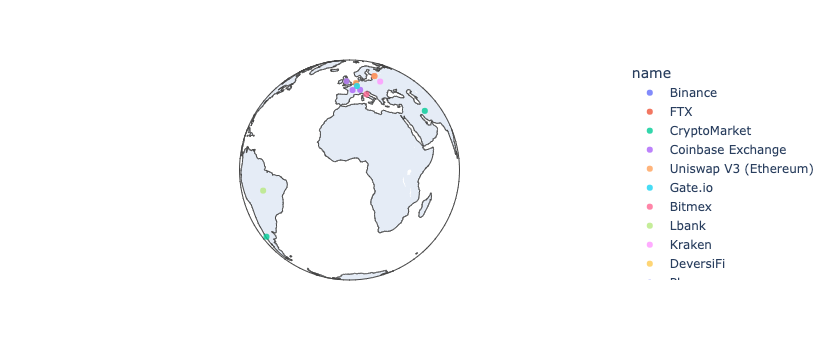

In [104]:
#Set plot parameter

map_fig = px.scatter_geo(country_data,
                         locations = 'location',
                         projection = 'orthographic',
                         color = 'name',
                         opacity = .8,
                         hover_name = 'location',
                         hover_data = ['1d.volume','website_url']
)

# Display Map
map_fig.show()

In [100]:
# save offline copy of fully functional map
plotly.offline.plot(map_fig,filename ='C:\worldwide_exchanges.html', auto_open = True)


'C:\\worldwide_exchanges.html'